In [1]:
%matplotlib inline
import numpy as np
import theano.tensor as tt
import pymc3 as pm

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
with pm.Model() as model:
    x = pm.Normal('x', mu=0, sigma=1, shape=10) # good

In [3]:
with pm.Model() as model:
    mu = pm.Normal('mu', mu=0, sigma=1)
    sd = pm.HalfNormal('sd', sigma=1)
    obs = pm.Normal('obs', mu=mu, sigma=sd, observed=np.random.randn(100))

    step1 = pm.Metropolis(vars=[mu])
    step2 = pm.Slice(vars=[sd])
    trace = pm.sample(10000, step=[step1, step2], cores=4)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [mu]
>Slice: [sd]
Sampling 4 chains: 100%|████████████████████████████████████████████████████| 42000/42000 [00:39<00:00, 1061.97draws/s]
The number of effective samples is smaller than 25% for some parameters.


In [3]:
np.random.randn(100)

array([-2.1598355 , -0.44640306, -0.72323566,  0.38253945, -0.98680639,
       -2.25864463, -2.85332553, -0.36916581, -0.21828455,  0.71291403,
        1.16134136, -0.16891988, -1.25221354, -0.12316597,  0.05553333,
        1.21553103,  1.10667834, -0.17324544,  0.47827021,  0.22298134,
        0.24329939, -0.55298933,  0.40846476,  1.98642419,  0.80407006,
        0.22402548, -0.42922448,  0.10659267, -0.17246068, -1.61989376,
        2.11361651, -1.25198784, -2.11218441, -1.65475247,  0.99898006,
       -0.49274113, -1.44193967,  0.21979187,  0.59862413,  0.38220738,
       -0.62461134,  1.59337074,  0.27700561, -1.82697009,  0.79067729,
       -1.07064789, -1.13707408,  2.05802855, -1.65132506, -1.22923108,
        0.98603579, -0.38163772, -0.60981625, -0.13725253,  0.51825378,
        0.17119801, -0.60694525, -0.23725714,  0.15670097,  0.26840676,
        0.77300501, -0.66271611,  0.95573904, -2.9321874 , -1.01577727,
        0.37026655,  0.21236328,  0.4134308 , -0.16999338,  0.22

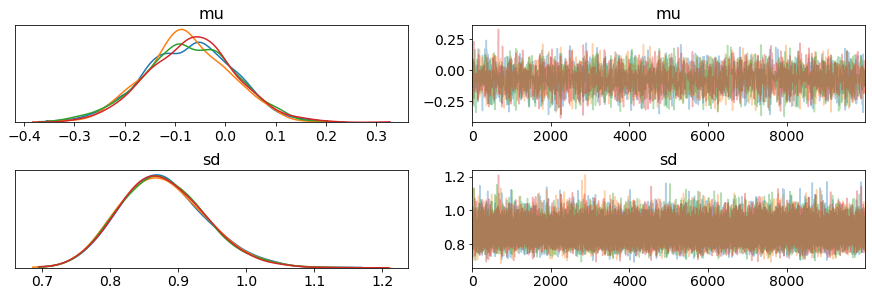

In [5]:
pm.traceplot(trace);

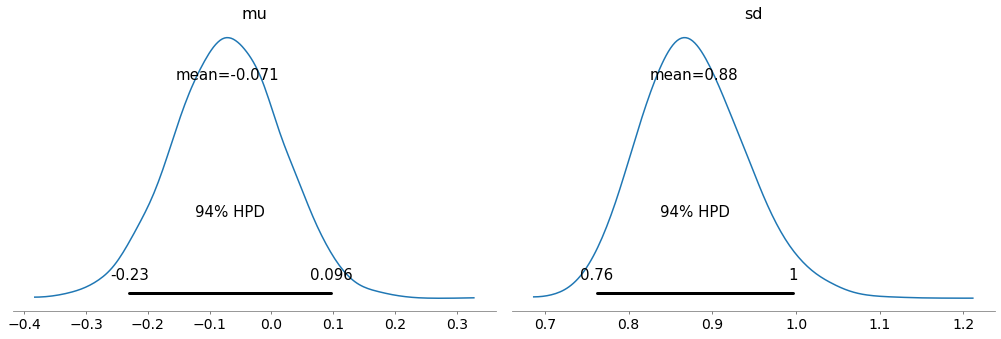

In [6]:
pm.plot_posterior(trace);